In [659]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings to igone them
import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix


## Reading and Understanding Data

In [660]:
#Reading the data 
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [661]:
# shape of the data(no of rows and columns)
df.shape

(918, 12)

In [662]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [663]:
# describing the data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Data Analyzing

In [664]:
categorical_cols = df.select_dtypes(include='O')
categorical_cols.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [665]:
for i in categorical_cols.columns:
    print(df[i].value_counts(),"\n")

M    725
F    193
Name: Sex, dtype: int64 

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 

N    547
Y    371
Name: ExerciseAngina, dtype: int64 

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 



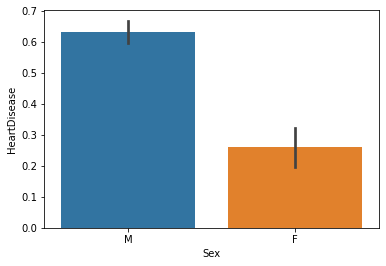

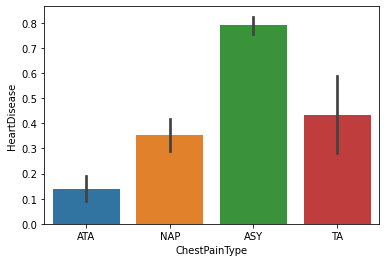

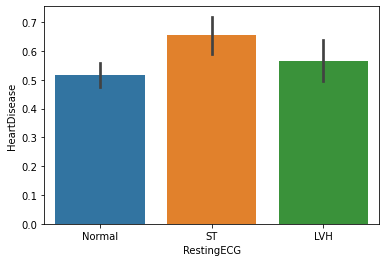

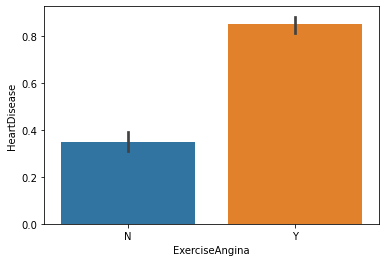

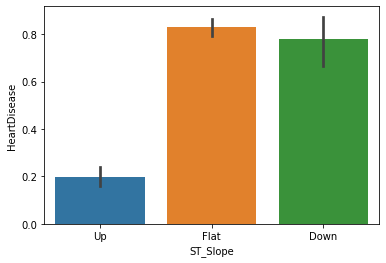

In [666]:
# plotting the bargraph for each categorical column vs target column
for i in categorical_cols.columns:
    sns.barplot(df[i],df['HeartDisease'])
    plt.show()

In [667]:
# Analyzing data for numerical columns
numeric_cols = df.select_dtypes(exclude='O')
numeric_cols.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


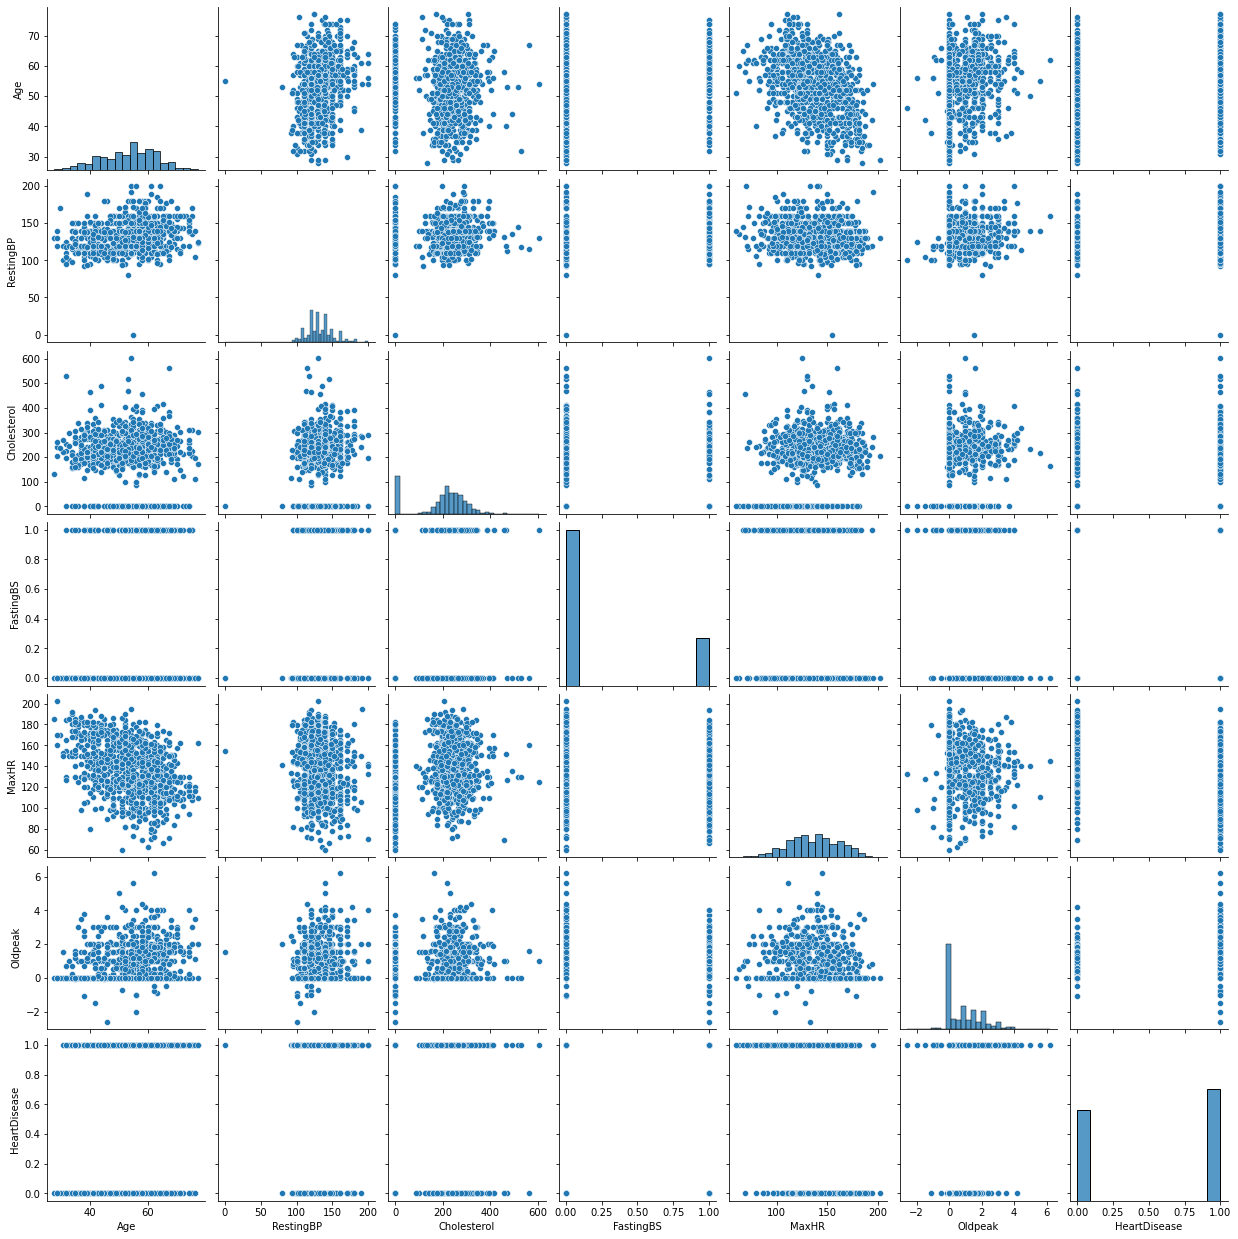

In [668]:
# pair plot for numerical columns
sns.pairplot(numeric_cols)

<AxesSubplot:>

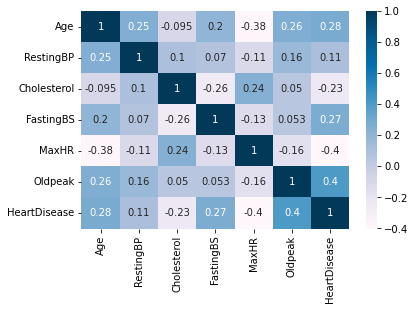

In [669]:
# checking for the correlation using heat map for numerical columns
sns.heatmap(numeric_cols.corr(),annot=True,cmap = 'PuBu')

In [670]:
#checking for null values if any
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Data Manipulation

In [671]:
# creating dummy variables for each categorical column
dummy = pd.get_dummies(categorical_cols)
dummy.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [672]:
# joining those categorical columns with actual data
df = pd.concat([df,dummy],1)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,...,0,0,0,1,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,...,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,...,0,0,0,0,1,1,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,...,0,0,0,1,0,0,1,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,...,1,0,0,1,0,1,0,0,0,1


In [673]:
# dropping the actual categorical columns
df.drop(categorical_cols.columns,1,inplace=True)

In [674]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [675]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [676]:
dumm2 = pd.get_dummies(df['FastingBS'],prefix='FastingBS_',drop_first=True)
dumm2.head()

,FastingBS__1
0,0
1,0
2,0
3,0
4,0


In [677]:
df = pd.concat([df,dumm2],1)
df.drop('FastingBS',1,inplace=True)

In [678]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS__1
0,40,140,289,172,0.0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,156,1.0,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,37,130,283,98,0.0,0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,108,1.5,1,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
4,54,150,195,122,0.0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


## Splitting the data into train test split

In [679]:
#importing train test split
from sklearn.model_selection import train_test_split
# dropping the target column
X = df.drop('HeartDisease',1)
y = df['HeartDisease']
# spliting the data 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=161)

In [680]:
#Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building

In [681]:
from sklearn.metrics import classification_report,accuracy_score

## Logistic Regression

Accuracy :  0.8586956521739131

classification_report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       122
           1       0.86      0.89      0.88       154

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.86       276
weighted avg       0.86      0.86      0.86       276



[[100  22]
 [ 17 137]]

Confusion Matrix Plot


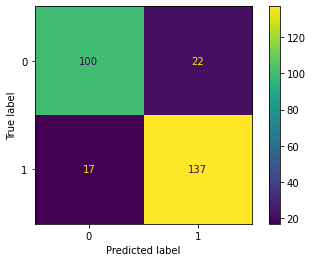

In [682]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=7)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
score_lr = accuracy_score(y_test,y_pred)

print('Accuracy : ',accuracy_score(y_test,y_pred))
print()
print('classification_report:')
print(classification_report(y_test,y_pred))
print()
print()
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
print()
print('Confusion Matrix Plot')
plot_confusion_matrix(lr, X_test, y_test)  
plt.show()

## Decision tree Classifier

Accuracy :  0.782608695652174 


classification_report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       122
           1       0.80      0.81      0.81       154

    accuracy                           0.78       276
   macro avg       0.78      0.78      0.78       276
weighted avg       0.78      0.78      0.78       276



[[ 91  31]
 [ 29 125]]

Confusion Matrix Plot


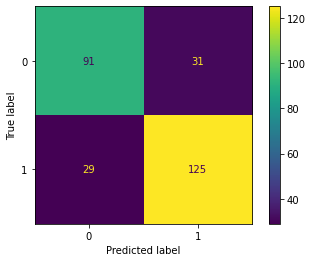

In [683]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=7)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
score_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy : ',accuracy_score(y_test,y_pred_dt),'\n')
print()
print('classification_report:')
print(classification_report(y_test,y_pred_dt))
print()
print()
cm2 = confusion_matrix(y_test, y_pred_dt)
print(cm2)
print()
print('Confusion Matrix Plot')
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()

## Random Forest

Accuracy :  0.8768115942028986 


classification_report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       122
           1       0.88      0.91      0.89       154

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



[[102  20]
 [ 14 140]]

Confusion Matrix Plot


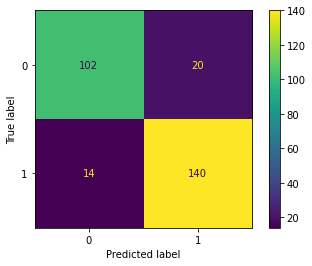

In [684]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=7)
rf.fit(X_train,y_train)

# print('Train Accuracy',rf.score(X_train,y_train))
y_pred_rf = rf.predict(X_test)
score_rf = accuracy_score(y_test,y_pred_rf)

print('Accuracy : ',accuracy_score(y_test,y_pred_rf),'\n')
print()
print('classification_report:')
print(classification_report(y_test,y_pred_rf))
print()
print()
cm3 = confusion_matrix(y_test, y_pred_rf)
print(cm3)
print()
print('Confusion Matrix Plot')
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

## Support vector Machine

Accuracy :  0.8586956521739131 


classification_report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       122
           1       0.84      0.92      0.88       154

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276


Confusion Matrix
[[ 96  26]
 [ 13 141]]

Confusion Matrix Plot


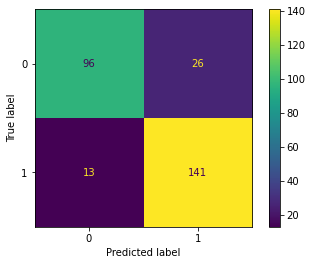

In [685]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

#svm = SGDClassifier(loss='hinge')

svm = SVC(random_state=7)
svm.fit(X_train,y_train)

y_svm_pred = svm.predict(X_test)

score_svm = accuracy_score(y_test,y_svm_pred)
print('Accuracy : ',accuracy_score(y_test,y_svm_pred),'\n')
print()
print('classification_report:')
print(classification_report(y_test,y_svm_pred))
print()
print('Confusion Matrix')
cm4 = confusion_matrix(y_test, y_svm_pred)
print(cm4)
print()
print('Confusion Matrix Plot')
plot_confusion_matrix(svm, X_test, y_test)  
plt.show()

In [686]:
# get importance
importance = rf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.06997
Feature: 1, Score: 0.06621
Feature: 2, Score: 0.08002
Feature: 3, Score: 0.09879
Feature: 4, Score: 0.10006
Feature: 5, Score: 0.02049
Feature: 6, Score: 0.01767
Feature: 7, Score: 0.05401
Feature: 8, Score: 0.01549
Feature: 9, Score: 0.01450
Feature: 10, Score: 0.00451
Feature: 11, Score: 0.01615
Feature: 12, Score: 0.01254
Feature: 13, Score: 0.00852
Feature: 14, Score: 0.05694
Feature: 15, Score: 0.06280
Feature: 16, Score: 0.00578
Feature: 17, Score: 0.11770
Feature: 18, Score: 0.15729
Feature: 19, Score: 0.02057


Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y',
       'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up', 'FastingBS__1'],
      dtype='object')


<AxesSubplot:>

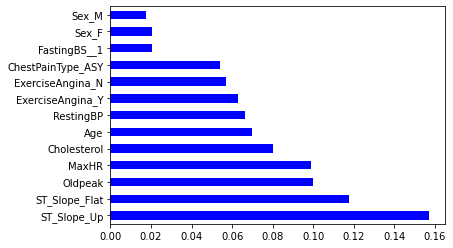

In [687]:
data = df
data.drop('HeartDisease', inplace=True, axis=1)
index= data.columns[:]
print(index)
importance = pd.Series(rf.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

#From the Feature Importance graph above, we can conclude that the top 4 significant features were chest pain type (cp), maximum heart rate achieved (thalach), number of major vessels (ca), and ST depression induced by exercise relative to rest (oldpeak).

In [688]:
scores = [score_lr,score_svm,score_dt,score_rf]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 0.8586956521739131 %
The accuracy score achieved using Support Vector Machine is: 0.8586956521739131 %
The accuracy score achieved using Decision Tree is: 0.782608695652174 %
The accuracy score achieved using Random Forest is: 0.8768115942028986 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

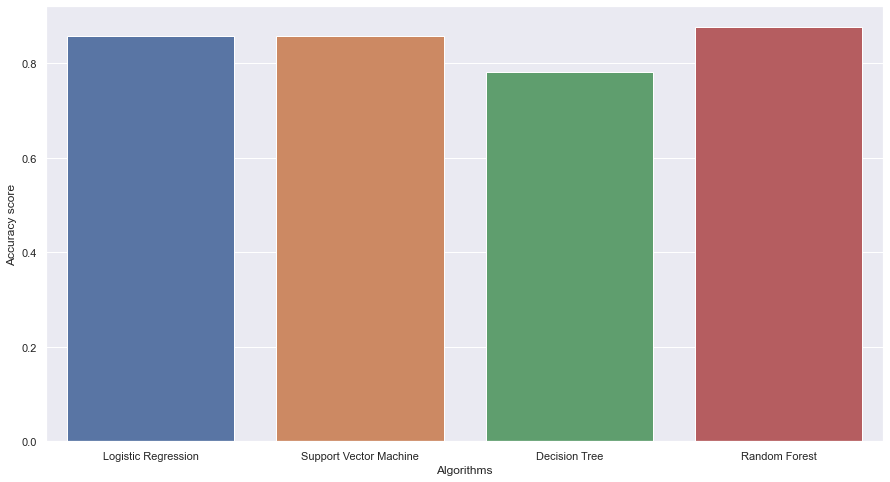

In [689]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

# Results

### We have preformed different models and compared each result with Accuracy score.
###  So, The final model which is good to predict is SVM as the Accuracy score is 90%.

From comparing the 7 models, we can conclude that Model 6: Random Forest yields the highest accuracy. With an accuracy of 80%. 🏆
